Reto Modelacion Estadistica

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Limpieza de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm
from math import sqrt as sqrt
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)
datos_sin_limpiar19 = pd.read_csv("/content/drive/My Drive/datos/Datos_molec_2019.csv")
datos_sin_limpiar20 = pd.read_csv("/content/drive/My Drive/datos/Datos_molec_2020.csv", encoding='latin-1')
datos_sin_limpiar21 = pd.read_csv("/content/drive/My Drive/datos/Datos_molec_2021.csv", encoding='latin-1')
datos_sin_limpiar22 = pd.read_csv("/content/drive/My Drive/datos/Datos_molec_2022.csv", encoding='latin-1')
datos_sin_limpiar23 = pd.read_csv("/content/drive/My Drive/datos/Datos_molec_2023.csv", encoding='latin-1')

datos_sin_limpiar = (datos_sin_limpiar19, datos_sin_limpiar20, datos_sin_limpiar21, datos_sin_limpiar22, datos_sin_limpiar23)

total_filas_sin_limpiar = []
for i in range(5):
  total_filas_sin_limpiar.append(datos_sin_limpiar[i].shape[0])
  print(f"Filas en {2019+i} antes de limpiar: {total_filas_sin_limpiar[i]}")


datos_sin_repetidos19 = datos_sin_limpiar19.drop_duplicates()
datos_sin_repetidos20 = datos_sin_limpiar20.drop_duplicates()
datos_sin_repetidos21 = datos_sin_limpiar21.drop_duplicates()
datos_sin_repetidos22 = datos_sin_limpiar22.drop_duplicates()
datos_sin_repetidos23 = datos_sin_limpiar23.drop_duplicates()
datos_sin_repetidos = (datos_sin_repetidos19,datos_sin_repetidos20, datos_sin_repetidos21, datos_sin_repetidos22, datos_sin_repetidos23)
print("--------")

filas_sin_repetidos = []
for i in range(5):
  filas_sin_repetidos.append(datos_sin_repetidos[i].shape[0])
  print(f"Filas sin repetidos en {2019+i}: {filas_sin_repetidos[i]}")

datos19 = datos_sin_repetidos19
datos20 = datos_sin_repetidos20
datos21 = datos_sin_repetidos21
datos22 = datos_sin_repetidos22
datos23 = datos_sin_repetidos23
datos = (datos19, datos20, datos21, datos22, datos23)
print(((datos19[:] == "NaN").sum()==0).sum())



Filas en 2019 antes de limpiar: 1980
Filas en 2020 antes de limpiar: 2010
Filas en 2021 antes de limpiar: 1948
Filas en 2022 antes de limpiar: 2016
Filas en 2023 antes de limpiar: 1996
--------
Filas sin repetidos en 2019: 1980
Filas sin repetidos en 2020: 2010
Filas sin repetidos en 2021: 1948
Filas sin repetidos en 2022: 2016
Filas sin repetidos en 2023: 1996
108


In [ ]:
nombres_columnas_lista = datos21.columns.tolist()
print(nombres_columnas_lista)


['folio', 'entidad', 'control', 'viv_sel', 'num_hog', 'hog_mud', 'n_ren_el', 'cd', 'periodo', 'sexo', 'edad', 'nivel', 'anio', 'cond_act', 'p1', 'p2', 'p3_1', 'p3_2', 'p3_3', 'p3_4', 'p3_5', 'p4', 'p5', 'p5_6esp', 'p6_1', 'p6_2', 'p6_3', 'p6_4', 'p6_5', 'p6_6', 'p6_6esp', 'p7', 'p7_3', 'p8_1', 'p8_2', 'p9', 'p9_5esp', 'p10', 'p11', 'p11_6esp', 'p12_1', 'p12_2', 'p12_3', 'p12_4', 'p12_5', 'p12_6', 'p12_7', 'p12_8', 'p12_9', 'p12_9esp', 'p13', 'p13_3', 'p14_1', 'p14_2', 'p15', 'p15_5esp', 'p16', 'p17', 'p17_6esp', 'p18_1', 'p18_2', 'p18_3', 'p18_4', 'p18_5', 'p19', 'p19_3', 'p20_1', 'p20_2', 'p21', 'p21_5esp', 'p22', 'p23_1', 'p23_2', 'p24', 'p25', 'p25_6esp', 'p26', 'p27', 'p28', 'p28_7esp', 'p29', 'p30', 'p31', 'p32', 'p32_6esp', 'p33_1', 'p33_2', 'p33_3', 'p33_4', 'p34_1', 'p34_2', 'p34_3', 'p34_3_1', 'p34_4', 'p34_4_1', 'p35', 'p36_1', 'p36_2', 'p36_3', 'p36_4', 'factor', 'h_lec', 'mat_lec', 'perslec', 'l_format', 'r_format', 'p_format', 'perslecl']


In [ ]:
columnas_interes=['entidad', 'edad', 'p1', 'p2', 'p3_1', 'p3_2', 'p3_3', 'p3_4', 'p3_5', 'p4', 'p5', 'p5_6esp', 'p6_1', 'p6_2', 'p6_3', 'p6_4', 'p6_5', 'p6_6', 'p6_6esp', 'p7', 'p10', 'p11', 'p11_6esp', 'p12_1', 'p12_2', 'p12_3', 'p12_4', 'p12_5', 'p12_6', 'p12_7', 'p12_8', 'p12_9', 'p12_9esp', 'p13', 'p16', 'p17', 'p17_6esp', 'p18_1', 'p18_2', 'p18_3', 'p18_4', 'p18_5', 'p19', 'p22', 'p24', 'p25', 'p25_6esp', 'p26', 'p31', 'p32', 'p32_6esp', 'p34_1', 'p34_2', 'p34_3', 'p34_3_1', 'p34_4', 'p35', 'l_format', 'r_format', 'p_format']
#lista extra para datos de 2019 porque cambian nombres de columnas para mismas preguntas
col_interes_19=['entidad', 'edad', 'p1', 'p2', 'p3_1', 'p3_2', 'p3_3', 'p3_4', 'p3_5', 'p4', 'p5', 'p5_6esp', 'p6_1', 'p6_2', 'p6_3', 'p6_4', 'p6_5', 'p6_6', 'p6_6esp', 'p7', 'p10', 'p11', 'p11_6esp', 'p12_1', 'p12_2', 'p12_3', 'p12_4', 'p12_5', 'p12_6', 'p12_7', 'p12_8', 'p12_9', 'p12_9esp', 'p13', 'p16', 'p17', 'p17_6esp', 'p18_1', 'p18_2', 'p18_3', 'p18_4', 'p18_5', 'p19', 'p22', 'p24', 'p25', 'p25_6esp', 'p26', 'p31', 'p32', 'p32_6esp', 'p34_1', 'p34_2', 'p34_3', 'p34_3_1', 'p34_4', 'p35', 'l_formato', 'r_formato', 'p_formato']
df19 = datos19[col_interes_19]
df20 = datos20[columnas_interes]
df21 = datos21[columnas_interes]
df22 = datos22[columnas_interes]
df23 = datos23[columnas_interes]


In [ ]:
df19.columns=[columnas_interes] #renombré columnas para homogeneizar análisis después de asegurarme que responden a lo mismo

In [ ]:
#asignar generación a cada registro
dataframes = [df19, df20, df21, df22, df23]
años = [2019, 2020, 2021, 2022, 2023]

for df in (dataframes):
  df.loc[:, 'generacion'] = 'NA'  # Inicializar la columna
  for index, row in df.iterrows():
    df.loc[index, 'generacion'] = clasificar_generacion(row['edad'])


NameError: name 'clasificar_generacion' is not defined

In [ ]:
df19

In [ ]:
'''lo guardo por si después en el análisis lo ocupamos separado por entidad
# Inicializar una lista para almacenar los resultados
resultados = []

# Verificar que 'entidad' y 'generacion' existan y sean unidimensionales
if 'entidad' in df20.columns and 'generacion' in df20.columns:
    # Agrupar por entidad
    for entidad, ent_group in df20.groupby('entidad'):
        # Agrupar por generación
        for generacion, gen_group in ent_group.groupby('generacion'):
            # Contar el número de entrevistas en cada grupo
            count = gen_group.shape[0]
            resultados.append({'entidad': entidad, 'generacion': generacion, 'count': count})

    # Convertir los resultados a un DataFrame
    resultados_df = pd.DataFrame(resultados)

    # Establecer un multiíndice
    resultados_df.set_index(['entidad', 'generacion'], inplace=True)

    # Mostrar el resultado
    print(resultados_df)
    '''
# Inicializar una lista para almacenar los resultados
resultados20 = []

# Agrupar por generación
for generacion, gen_group in df20.groupby('generacion'):
    # Contar el número de entrevistas en cada grupo
    count = gen_group.shape[0]
    resultados20.append({'generacion': generacion, 'count': count})

# Convertir los resultados a un DataFrame
resultados_df20 = pd.DataFrame(resultados20)

# Establecer la columna 'generacion' como índice
resultados_df20.set_index('generacion', inplace=True)

# Mostrar el resultado
resultados_df20


In [ ]:
# Inicializar una lista para almacenar los resultados
resultados21 = []

# Agrupar por generación
for generacion, gen_group in df21.groupby('generacion'):
    # Contar el número de entrevistas en cada grupo
    count = gen_group.shape[0]
    resultados21.append({'generacion': generacion, 'count': count})

# Convertir los resultados a un DataFrame
resultados_df21 = pd.DataFrame(resultados21)

# Establecer la columna 'generacion' como índice
resultados_df21.set_index('generacion', inplace=True)

# Mostrar el resultado
resultados_df21

In [ ]:
# Inicializar una lista para almacenar los resultados
resultados22 = []

# Agrupar por generación
for generacion, gen_group in df22.groupby('generacion'):
    # Contar el número de entrevistas en cada grupo
    count = gen_group.shape[0]
    resultados22.append({'generacion': generacion, 'count': count})

# Convertir los resultados a un DataFrame
resultados_df22 = pd.DataFrame(resultados20)

# Establecer la columna 'generacion' como índice
resultados_df22.set_index('generacion', inplace=True)

# Mostrar el resultado
resultados_df22

In [ ]:
# Inicializar una lista para almacenar los resultados
resultados23 = []

# Agrupar por generación
for generacion, gen_group in df23.groupby('generacion'):
    # Contar el número de entrevistas en cada grupo
    count = gen_group.shape[0]
    resultados23.append({'generacion': generacion, 'count': count})

# Convertir los resultados a un DataFrame
resultados_df23 = pd.DataFrame(resultados23)

# Establecer la columna 'generacion' como índice
resultados_df23.set_index('generacion', inplace=True)

# Mostrar el resultado
resultados_df23

In [ ]:
'''Calcula medidas estadísticas
Variables cuantitativas
Medidas de tendencia central: media, mediana y rango medio.
Medidas de dispersión: desviación estándar, coeficiente de variación.
Medidas de posición: cuartiles
Medidas de forma: sesgo, curtosis'''

In [ ]:
'''Variables cualitativas
Tabla de distribución de frecuencia
Para escala ordinal: Mediana'''

In [ ]:
'''Explora los datos usando herramientas de visualización
Variables cuantitativas:
Medidas de posición no-central: cuartiles, outlier (valores atípicos) que se visualizan en el boxplots
Análisis de distribución de los datos (Histogramas). Identificar si tiene forma simétrica o asimétrica y revisar entre qué valores varían los datos, en donde se concentran más los datos
Análisis de correlación  de los datos para ver si dos variables cuantitativas están relacionadas linealmente entre sí'''

In [ ]:
'''Variables categóricas
Distribución de los datos (diagramas de barras, diagramas de pastel)'''

In [ ]:
'''Vincula los datos categóricos con los numéricos de acuerdo a tu objetivo:
Calcula las medidas de las variables cuantitativas por categoría de alguna variable categórica de interés
Elabora gráficos de caja y bigote de las variables cuantitativas por categoría de alguna variable categórica de interés
Elabora gráficos comparativos por años si tu objetivo es comparar años'''

Funciones


In [ ]:
def filtro_por_edad(year, min, max = None): #Regresa el numero de personas dentro de un rango de edad. Si no se especifica el maximo, toma el valor del minimo (osea que si pones funcion(2019, 19) va a regresar el numero de personas que tienen 19 en 2019, si pones funcion(2019, 19, 23) regresara el numero de personas que tienen entre 19 y 23 en el 2019)
  if max == None:
    max = min
  idx = 0
  x = year - 2019
  por_edad19 = {}
  por_edad20 = {}
  por_edad21 = {}
  por_edad22 = {}
  por_edad23 = {}
  diccionarios_edad = [por_edad19, por_edad20, por_edad21, por_edad22, por_edad23]

  if max > datos[idx]["edad"].max():
    return 0

  for i in range(5):
    #print(f"Cantidad de personas por edad en el año {2019+idx}")
    for anio in range(int(datos[idx]["edad"].min()), int(datos[idx]["edad"].max())+1):
      edad = (datos[idx]["edad"] == anio).sum()
      diccionarios_edad[idx][anio] = edad
      #print(f"{anio} años: {edad}")
    idx = idx + 1
  claves_edad19 = list(por_edad19.keys())

  c = 0


  for i in range(min, max+1):
    c = c + diccionarios_edad[x].get(i,0)
  return c


In [ ]:
fadf = filtro_por_edad(2019, 18, 24)
print(fadf)

241


In [ ]:
def clasificar_generacion(edad):
    if edad < 24:  # Gen Z
        return 'gen_z'
    elif 24 <= edad < 39:  # Millennials
        return 'millennials'
    elif 39 <= edad < 55:  # Gen X
        return 'gen_x'
    elif 55 <= edad < 75:  # Baby Boomers
        return 'baby_boomers'
    elif edad >=75:
        return '75+'
    else:
        return 'NA'


In [ ]:
def cantidad(year, generacion):
  df = datos[year-2019]

  add_column = []
  for i in df["edad"]:
    if i < 24:  # Gen Z
          add_column.append('gen_z')
    elif 24 <= i < 39:  # Millennials
          add_column.append('millennials')
    elif 39 <= i < 55:  # Gen X
          add_column.append('gen_x')
    elif 55 <= i < 75:  # Baby Boomers
          add_column.append('baby_boomers')
    elif i >=75:
          add_column.append('75+')
    else:
          add_column.append('NA')
  df.loc[:, "generacion"] = add_column
  df = df[df["generacion"] == generacion]
  return df.shape[0]

In [ ]:
def varianza(year, generacion, columna):
  df = datos[year- 2019][["edad", columna]]
  add_column = []
  for i in df["edad"]:
    if i < 24:  # Gen Z
          add_column.append('gen_z')
    elif 24 <= i < 39:  # Millennials
          add_column.append('millennials')
    elif 39 <= i < 55:  # Gen X
          add_column.append('gen_x')
    elif 55 <= i < 75:  # Baby Boomers
          add_column.append('baby_boomers')
    elif i >=75:
          add_column.append('75+')
    else:
          add_column.append('NA')
  df.loc[:, "generacion"] = add_column
  result = df[df["generacion"] == generacion][columna].var()
  return result

In [ ]:
def me(year, generacion, columna):
  df = datos[year- 2019][["edad", columna]]
  add_column = []
  for i in df["edad"]:
    if i < 24:  # Gen Z
          add_column.append('gen_z')
    elif 24 <= i < 39:  # Millennials
          add_column.append('millennials')
    elif 39 <= i < 55:  # Gen X
          add_column.append('gen_x')
    elif 55 <= i < 75:  # Baby Boomers
          add_column.append('baby_boomers')
    elif i >=75:
          add_column.append('75+')
    else:
          add_column.append('NA')
  df.loc[:, "generacion"] = add_column
  result = (df[df["generacion"] == generacion][columna]).mean()
  return result

In [ ]:
def me2(year, generacion, columna):
  df = datos[year- 2019][["edad", columna]]
  add_column = []
  for i in df["edad"]:
    if i < 24:  # Gen Z
          add_column.append('gen_z')
    elif 24 <= i < 39:  # Millennials
          add_column.append('millennials')
    elif 39 <= i < 55:  # Gen X
          add_column.append('gen_x')
    elif 55 <= i < 75:  # Baby Boomers
          add_column.append('baby_boomers')
    elif i >=75:
          add_column.append('75+')
    else:
          add_column.append('NA')
  df.loc[:, "generacion"] = add_column
  result = (df[df["generacion"] == generacion][columna]).to_list()
  return result




Numero de libros por generacion a traves de los años




In [ ]:
def cuantitativa_por_generacion(year, key):
  books_per_year = datos[year-2019][["edad", key]]
  add_column = []
  yearsdef= []
  for i in books_per_year["edad"]:
    yearsdef.append(year)
    if i < 24:  # Gen Z
          add_column.append('gen_z')
    elif 24 <= i < 39:  # Millennials
          add_column.append('millennial')
    elif 39 <= i < 55:  # Gen X
          add_column.append('gen_x')
    elif 55 <= i < 75:  # Baby Boomers
          add_column.append('baby_boomer')
    elif i >=75:
          add_column.append('75+')
    else:
          add_column.append('NA')
  books_per_year.loc[:, "generacion"] = add_column
  books_per_year.loc[:, "year"] = yearsdef
  df = pd.DataFrame({
      "año" : [year],
      "gen_z" : [books_per_year.loc[books_per_year["generacion"] == "gen_z", key].sum()],
      "millennials" : [books_per_year.loc[books_per_year["generacion"] == "millennial", key].sum()],
      "gen_x" : [books_per_year.loc[books_per_year["generacion"] == "gen_x", key].sum()],
      "baby_boomers" : [books_per_year.loc[books_per_year["generacion"] == "baby_boomer", key].sum()],
      "75+" : [books_per_year.loc[books_per_year["generacion"] == "75+", key].sum()]
      })

  return df




In [ ]:
def graficar_cuantitativa_por_generacion(v1,v2,v3,v4,v5, titulo, ylabel, ubi = "upper right"):
  df_combined = pd.concat([v1, v2, v3, v4, v5], ignore_index=True)
  # Crear el gráfico de líneas
  plt.plot(df_combined["año"], df_combined["gen_z"], label='Gen Z', marker='o')
  plt.plot(df_combined["año"], df_combined["millennials"], label='Millennials', marker='o')
  plt.plot(df_combined["año"], df_combined["gen_x"], label='Gen X', marker='o')
  plt.plot(df_combined["año"], df_combined["baby_boomers"], label='Baby Boomers', marker='o')
  plt.plot(df_combined["año"], df_combined["75+"], label='75+', marker='o')

  # Añadir etiquetas y título
  plt.xlabel('Año')
  plt.ylabel(ylabel)
  plt.title(titulo)
  years = [2019, 2020, 2021, 2022, 2023]
  plt.xticks(ticks = years, labels = years)

  # Mostrar leyenda
  plt.legend(loc = ubi, fontsize = "small")

  # Mostrar el gráfico
  plt.show()


In [ ]:
def cuantitativa_por_generacion_promedio(year, key):
  books_per_year = datos[year-2019][["edad", key]]
  add_column = []
  yearsdef= []
  for i in books_per_year["edad"]:
    yearsdef.append(year)
    if i < 24:  # Gen Z
          add_column.append('gen_z')
    elif 24 <= i < 39:  # Millennials
          add_column.append('millennial')
    elif 39 <= i < 55:  # Gen X
          add_column.append('gen_x')
    elif 55 <= i < 75:  # Baby Boomers
          add_column.append('baby_boomer')
    elif i >=75:
          add_column.append('75+')
    else:
          add_column.append('NA')
  books_per_year.loc[:, "generacion"] = add_column
  books_per_year.loc[:, "year"] = yearsdef
  df = pd.DataFrame({
      "gen_z" : [books_per_year.loc[books_per_year["generacion"] == "gen_z", key].sum()],
      "millennials" : [books_per_year.loc[books_per_year["generacion"] == "millennial", key].sum()],
      "gen_x" : [books_per_year.loc[books_per_year["generacion"] == "gen_x", key].sum()],
      "baby_boomers" : [books_per_year.loc[books_per_year["generacion"] == "baby_boomer", key].sum()],
      "75+" : [books_per_year.loc[books_per_year["generacion"] == "75+", key].sum()]
      })
  df2 = pd.DataFrame({
      "año" : [year],
      "gen_z" : [df["gen_z"] /(books_per_year["generacion"] == "gen_z").sum()],
      "millennials" : [df["millennials"] / (books_per_year["generacion"] == "millennial").sum()],
      "gen_x" : [df["gen_x"] / (books_per_year["generacion"] == "gen_x").sum()],
      "baby_boomers" : [df["baby_boomers"] / (books_per_year["generacion"] == "baby_boomer").sum()],
      "75+" : [df["75+"] / (books_per_year["generacion"] == "75+").sum()]


  })

  return df2

In [ ]:
def graficar_cuantitativa_por_generacion_promedio(v1,v2,v3,v4,v5, titulo, ylabel, ubi = "upper right"):



  df_combined = pd.concat([v1, v2, v3, v4, v5], ignore_index=True)
  # Crear el gráfico de líneas
  plt.plot(df_combined["año"], df_combined["gen_z"], label='Gen Z', marker='o')
  plt.plot(df_combined["año"], df_combined["millennials"], label='Millennials', marker='o')
  plt.plot(df_combined["año"], df_combined["gen_x"], label='Gen X', marker='o')
  plt.plot(df_combined["año"], df_combined["baby_boomers"], label='Baby Boomers', marker='o')
  plt.plot(df_combined["año"], df_combined["75+"], label='75+', marker='o')

  # Añadir etiquetas y título
  plt.xlabel('Año')
  plt.ylabel(ylabel)
  plt.title(titulo)
  years = [2019, 2020, 2021, 2022, 2023]
  plt.xticks(ticks = years, labels = years)

  # Mostrar leyenda
  plt.legend(loc = ubi, fontsize = "small")

  # Mostrar el gráfico
  plt.show()

In [ ]:
def contenido_digital_por_generacion(year):
  digital = datos[year-2019][["edad", "p8_1", "p14_1", "p20_1"]]
  coldcd = ["p8_1", "p14_1", "p20_1"]
  add_column = []
  yearsdef= []
  for i in digital["edad"]:
    yearsdef.append(year)
    if i < 24:  # Gen Z
          add_column.append('gen_z')
    elif 24 <= i < 39:  # Millennials
          add_column.append('millennial')
    elif 39 <= i < 55:  # Gen X
          add_column.append('gen_x')
    elif 55 <= i < 75:  # Baby Boomers
          add_column.append('baby_boomer')
    elif i >=75:
          add_column.append('75+')
    else:
          add_column.append('NA')
  digital.loc[:, "generacion"] = add_column
  digital.loc[:, "year"] = yearsdef
  df = pd.DataFrame({
      "año" : [year],
      "gen_z" : [((digital.loc[digital['generacion'] == 'gen_z' , "p8_1"] == 1).sum()) +
                 ((digital.loc[digital['generacion'] == 'gen_z' , "p14_1"] == 1).sum()) +
                 ((digital.loc[digital['generacion'] == 'gen_z' , "p20_1"] == 1).sum())],

      "millennials" : [((digital.loc[digital['generacion'] == 'millennial' , "p8_1"] == 1).sum()) +
                 ((digital.loc[digital['generacion'] == 'millennial' , "p14_1"] == 1).sum()) +
                 ((digital.loc[digital['generacion'] == 'millennial' , "p20_1"] == 1).sum())],

      "gen_x" : [((digital.loc[digital['generacion'] == 'gen_x' , "p8_1"] == 1).sum()) +
                 ((digital.loc[digital['generacion'] == 'gen_x' , "p14_1"] == 1).sum()) +
                 ((digital.loc[digital['generacion'] == 'gen_x' , "p20_1"] == 1).sum())],
      "baby_boomers" : [((digital.loc[digital['generacion'] == 'baby_boomer' , "p8_1"] == 1).sum()) +
                 ((digital.loc[digital['generacion'] == 'baby_boomer' , "p14_1"] == 1).sum()) +
                 ((digital.loc[digital['generacion'] == 'baby_boomer' , "p20_1"] == 1).sum())],

      "75+" : [((digital.loc[digital['generacion'] == '75+' , "p8_1"] == 1).sum()) +
                 ((digital.loc[digital['generacion'] == '75+' , "p14_1"] == 1).sum()) +
                 ((digital.loc[digital['generacion'] == '75+' , "p20_1"] == 1).sum())]
      })

  return df

In [ ]:
def funcion_general(year, *cols):

  valores_esperados = []
  columnas = []
  for col in cols:
    if type(col) == str:
      columnas.append(col)
    else:
      valores_esperados.append(col)
  columnas.insert(0, "edad")

  digital = datos[year-2019][columnas]

  add_column = []
  yearsdef= []
  generaciones = ["gen_z", "millennial", "gen_x", "baby_boomer", "75+"]
  for i in digital["edad"]:
    yearsdef.append(year)
    if i < 24:  # Gen Z
          add_column.append('gen_z')
    elif 24 <= i < 39:  # Millennials
          add_column.append('millennial')
    elif 39 <= i < 55:  # Gen X
          add_column.append('gen_x')
    elif 55 <= i < 75:  # Baby Boomers
          add_column.append('baby_boomer')
    elif i >=75:
          add_column.append('75+')
    else:
          add_column.append('NA')
  digital.loc[:, "generacion"] = add_column
  df = pd.DataFrame(columns = ["year", "gen_z" , "millennials", "gen_x", "baby_boomers", "75+"])

  for valor in valores_esperados:
    valor = int(valor)

    a = 0
    for col in columnas:

      if a == 0:
        df.loc[len(df)] = [year,
                ((digital.loc[digital['generacion'] == 'gen_z' , col] == valor ).sum()),
                ((digital.loc[digital['generacion'] == 'millennial' , col] == valor ).sum()),
                ((digital.loc[digital["generacion"] == "gen_x" , col] == valor).sum()),
                ((digital.loc[digital["generacion"] == "baby_boomer" , col] == valor).sum()),
                ((digital.loc[digital["generacion"] == "75+" , col] == valor).sum())
        ]
      else:

        newrow = [0,
                ((digital.loc[digital['generacion'] == 'gen_z' , col] == valor ).sum()),
                ((digital.loc[digital['generacion'] == 'millennial' , col] == valor ).sum()),
                ((digital.loc[digital["generacion"] == "gen_x" , col] == valor).sum()),
                ((digital.loc[digital["generacion"] == "baby_boomer" , col] == valor).sum()),
                ((digital.loc[digital["generacion"] == "75+" , col] == valor).sum())
        ]

        df.loc[len(df)-1] = df.loc[len(df)-1] + newrow
      a = a + 1




  return df

In [ ]:
def graficar_funcion_general(df1,df2,df3,df4,df5, titulo, ylabel, *preguntas):
    df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
    # Crear el gráfico de líneas
    plt.plot(df["year"], df["gen_z"], label='Gen Z', marker='o')
    plt.plot(df["year"], df["millennials"], label='Millennials', marker='o')
    plt.plot(df["year"], df["gen_x"], label='Gen X', marker='o')
    plt.plot(df["year"], df["baby_boomers"], label='Baby Boomers', marker='o')
    plt.plot(df["year"], df["75+"], label='75+', marker='o')

    # Añadir etiquetas y título
    plt.xlabel('Año')
    plt.ylabel(ylabel)
    plt.title(titulo)
    years = [2019, 2020, 2021, 2022, 2023]
    plt.xticks(ticks = years, labels = years)

    # Mostrar leyenda
    plt.legend( fontsize = "small")

    # Mostrar el gráfico
    plt.show()


In [ ]:
def filtrar_por_edad(df, year, *valores):
  columnas = ["edad"]
  values = []
  for valor in valores:
    if type(valor) == str:
      columnas.append(valor)
    else:
      values.append(valor)
  df = df[columnas]
  df.insert(0, "year", year)
  columnas = ["year"] + columnas
  min = df["edad"].min()
  max = df["edad"].max()
  edades = list(range(min, max+1))
  df2 = pd.DataFrame(columns = [columnas])
  if values:
    for edad in edades:
      agregar = [year, edad]
      for columna in columnas[2:]:
        agregar.append((df.loc[df["edad"] == edad, columna] == values[0]).sum())
      df2.loc[len(df2)] = agregar
  else:
    for edad in edades:
      agregar = [year, edad]

      for columna in columnas[2:]:

        agregar.append(df.loc[df["edad"] == edad, columna].sum())
      df2.loc[len(df2)] = agregar

  return df2



In [ ]:
def graficar_filtrar_por_edad(*years):

  for df in years:
    year = df.iloc[1]["year"]

    plt.plot(df["edad"], df.iloc[:,2], linestyle = "-", label = year)
    # Añadir etiquetas y título
  plt.xlabel('Edad')
  plt.ylabel('Cantidad')
  plt.legend(title = "Año")
  plt.show()

Libros por generacion (p4)

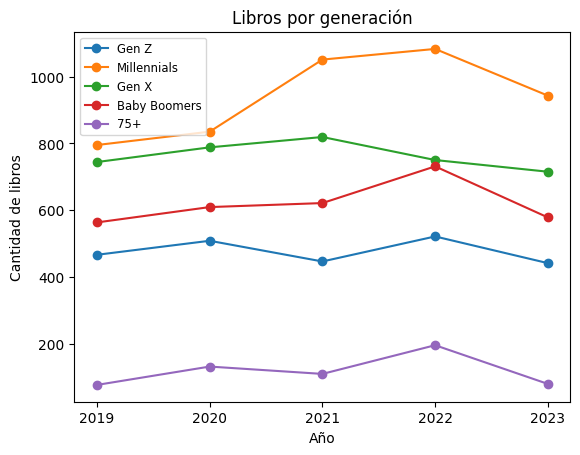

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


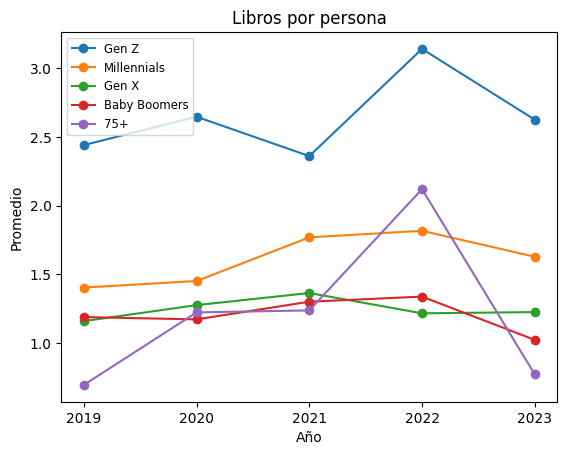

In [ ]:
lib2019 = cuantitativa_por_generacion(2019, "p4")
lib2020 = cuantitativa_por_generacion(2020, "p4")
lib2021 = cuantitativa_por_generacion(2021, "p4")
lib2022 = cuantitativa_por_generacion(2022, "p4")
lib2023 = cuantitativa_por_generacion(2023, "p4")
graficar_cuantitativa_por_generacion(lib2019, lib2020, lib2021, lib2022, lib2023, "Libros por generación", "Cantidad de libros", "upper left")

promlib2019 = cuantitativa_por_generacion_promedio(2019, "p4")
promlib2020 = cuantitativa_por_generacion_promedio(2020, "p4")
promlib2021 = cuantitativa_por_generacion_promedio(2021, "p4")
promlib2022 = cuantitativa_por_generacion_promedio(2022, "p4")
promlib2023 = cuantitativa_por_generacion_promedio(2023, "p4")
graficar_cuantitativa_por_generacion_promedio(promlib2019, promlib2020, promlib2021, promlib2022, promlib2023, "Libros por persona", "Promedio", "upper left")


Periodicos por generación (p16)


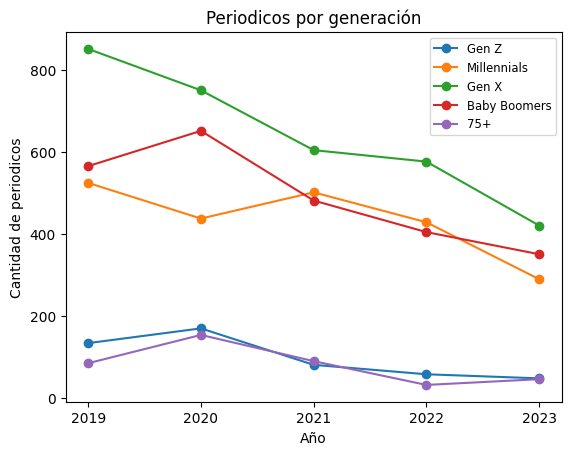

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


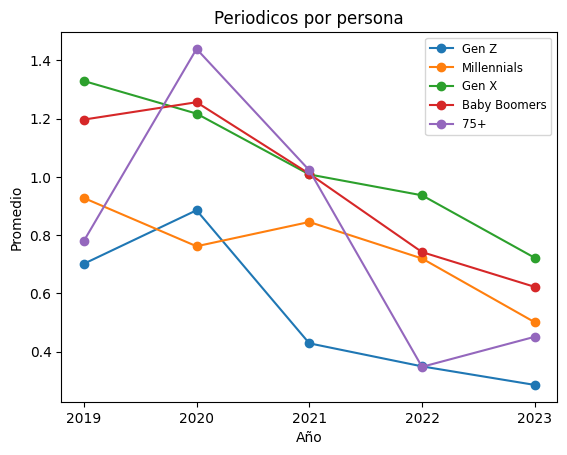

In [ ]:
p19 = cuantitativa_por_generacion(2019, "p16")
p20 = cuantitativa_por_generacion(2020, "p16")
p21 = cuantitativa_por_generacion(2021, "p16")
p22 = cuantitativa_por_generacion(2022, "p16")
p23 = cuantitativa_por_generacion(2023, "p16")
graficar_cuantitativa_por_generacion(p19, p20, p21, p22, p23, "Periodicos por generación", "Cantidad de periodicos")

promp19 = cuantitativa_por_generacion_promedio(2019, "p16")
promp20 = cuantitativa_por_generacion_promedio(2020, "p16")
promp21 = cuantitativa_por_generacion_promedio(2021, "p16")
promp22 = cuantitativa_por_generacion_promedio(2022, "p16")
promp23 = cuantitativa_por_generacion_promedio(2023, "p16")
graficar_cuantitativa_por_generacion_promedio(promp19, promp20, promp21, promp22, promp23, "Periodicos por persona", "Promedio")

Revistas por año (p10)

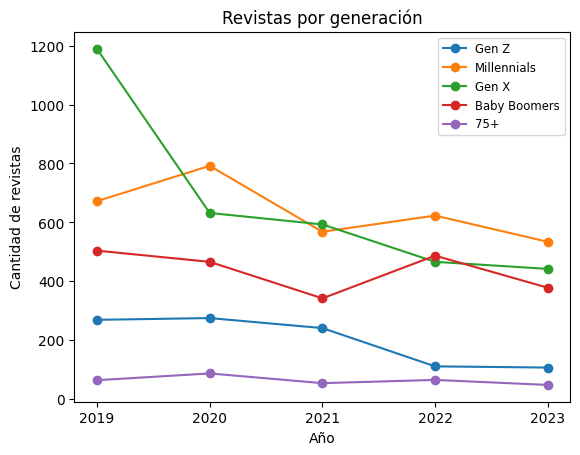

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


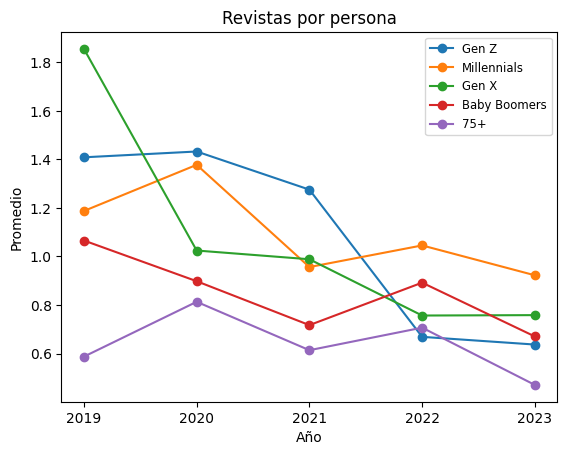

In [ ]:
r19 = cuantitativa_por_generacion(2019, "p10")
r20 = cuantitativa_por_generacion(2020, "p10")
r21 = cuantitativa_por_generacion(2021, "p10")
r22 = cuantitativa_por_generacion(2022, "p10")
r23 = cuantitativa_por_generacion(2023, "p10")
graficar_cuantitativa_por_generacion(r19, r20, r21, r22, r23, "Revistas por generación", "Cantidad de revistas")

promr19 = cuantitativa_por_generacion_promedio(2019, "p10")
promr20 = cuantitativa_por_generacion_promedio(2020, "p10")
promr21 = cuantitativa_por_generacion_promedio(2021, "p10")
promr22 = cuantitativa_por_generacion_promedio(2022, "p10")
promr23 = cuantitativa_por_generacion_promedio(2023, "p10")
graficar_cuantitativa_por_generacion_promedio(promr19, promr20, promr21, promr22, promr23, "Revistas por persona", "Promedio")

Contenido digital por generacion

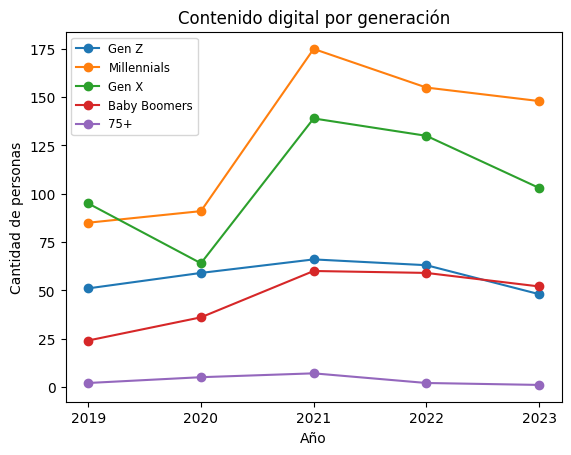

NameError: name 'funcion_general' is not defined

In [ ]:
cont_digital19 = contenido_digital_por_generacion(2019)
cont_digital20 = contenido_digital_por_generacion(2020)
cont_digital21 = contenido_digital_por_generacion(2021)
cont_digital22 = contenido_digital_por_generacion(2022)
cont_digital23 = contenido_digital_por_generacion(2023)
graficar_cuantitativa_por_generacion(cont_digital19, cont_digital20, cont_digital21, cont_digital22, cont_digital23, "Contenido digital por generación", "Cantidad de personas", "upper left")
#comprobacion1 = cont_digital19["gen_z"] + cont_digital19["millennials"] + cont_digital19["gen_x"] + cont_digital19["baby_boomers"] + cont_digital19["75+"]
#comprobacion2 = int((datos19["p8_1"] ==1).sum() + (datos19["p14_1"] == 1).sum() + (datos19["p20_1"] ==1 ).sum())
#comprobacion2 == comprobacion1
xd = funcion_general(2019, "p8_1", 1)
xd2 = funcion_general(2020, "p8_1", 1)
xd3 = funcion_general(2021, "p8_1", 1)
xd4 = funcion_general(2022, "p8_1", 1)
xd5 = funcion_general(2023, "p8_1", 1)
graficar_funcion_general(xd, xd2, xd3, xd4, xd5, "Contenido digital por generación", "Cantidad de personas")
xd2



Tabla de frecuencia de libros


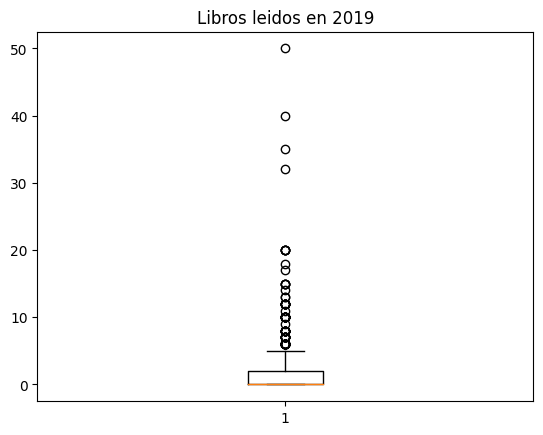

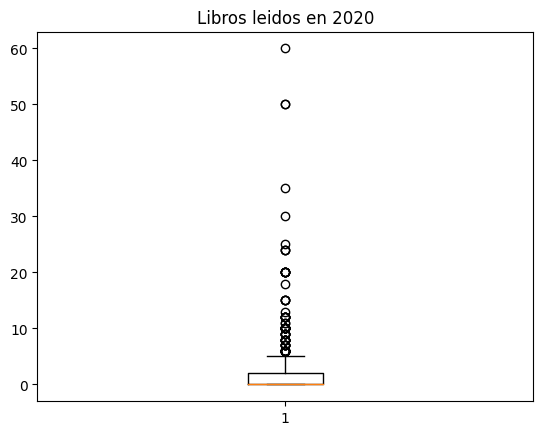

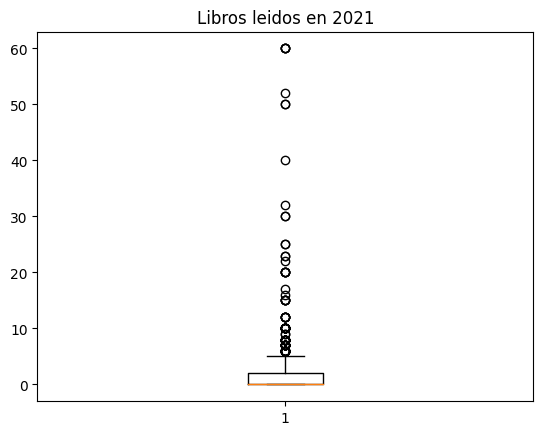

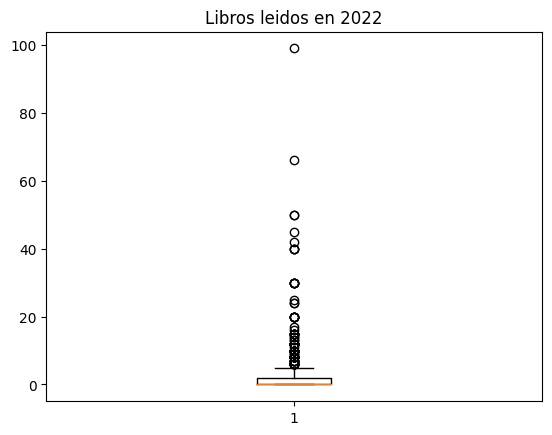

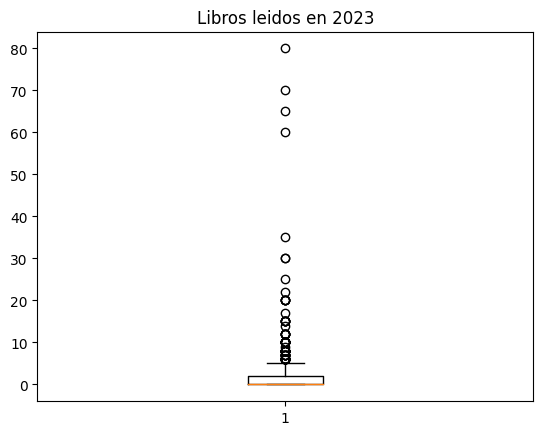

In [ ]:
for i in range(2019, 2024):

  plt.figure()
  plt.boxplot(datos[i-2019]["p4"])
  plt.title(f"Libros leidos en {i}")
  plt.show()


In [ ]:
for i in range(2019, 2024):

  plt.figure()
  plt.boxplot(datos[i-2019]["p10"])
  plt.title(f"Revistas leidos en {i}")
  plt.show()

In [ ]:
for i in range(2019, 2024):

  plt.figure()
  plt.boxplot(datos[i-2019]["p16"])
  plt.title(f"Periodicos leidos en {i}")
  plt.show()

In [ ]:
for i in range(5):
  if i == 0:
    leer_escribir = funcion_general(2019+i, "p1", 1,2)
    dato1 = int(leer_escribir.iloc[0].sum()) - (2019+i)
    dato2 = int(leer_escribir.iloc[1].sum()) - (2019 +i)
    plt.bar(["sí", "no"],[dato1, dato2])
    plt.title(f"Sabe leer y escribir  {2019+i}")
    plt.show()
  else:
    leer_escribir1= funcion_general(2019+i, "p1", 1,2)
    dato1 = int(leer_escribir1.iloc[0].sum()) - (2019+i)
    dato2 = int(leer_escribir1.iloc[1].sum()) - (2019 +i)
    plt.bar(["sí", "no"],[dato1, dato2])
    plt.title(f"Sabe leer y escribir {2019+i}")
    plt.show()

    leer_escribir = pd.concat([leer_escribir, leer_escribir1], ignore_index=True)
leer_escribir

In [ ]:

for i in range(5):
  if i == 0:
    leer_escribir = funcion_general(2019+i, "p2", 1,2)
    dato1 = int(leer_escribir.iloc[0].sum()) - (2019+i)
    dato2 = int(leer_escribir.iloc[1].sum()) - (2019 +i)
    plt.bar(["sí", "no"],[dato1, dato2])
    plt.title(f"Acostumbra leer  {2019+i}")
    plt.show()
  else:
    leer_escribir1= funcion_general(2019+i, "p2", 1,2)
    dato1 = int(leer_escribir1.iloc[0].sum()) - (2019+i)
    dato2 = int(leer_escribir1.iloc[1].sum()) - (2019 +i)
    plt.bar(["sí", "no"],[dato1, dato2])
    plt.title(f"Acostumbra leer {2019+i}")
    plt.show()

    leer_escribir = pd.concat([leer_escribir, leer_escribir1], ignore_index=True)
leer_escribir

In [ ]:
for i in range(5):
  if i == 0:
    leer_escribir = funcion_general(2019+i, "p5", 1,2,3,4,5,6)
    dato1 = int(leer_escribir.iloc[0].sum()) - (2019+ i)
    dato2 = int(leer_escribir.iloc[1].sum()) - (2019 +i)
    dato3 = int(leer_escribir.iloc[2].sum()) - (2019 +i)
    dato4 = int(leer_escribir.iloc[3].sum()) - (2019 +i)
    dato5 = int(leer_escribir.iloc[4].sum()) - (2019 +i)
    dato6 = int(leer_escribir.iloc[5].sum()) - (2019 +i)
    plt.bar(["trabajo", "estudio", "cultura general", "gusto", "religion", "otro"],[dato1, dato2, dato3, dato4, dato5, dato6])
    plt.title(f"Motivo de leer libros en  {2019+i}")
    plt.show()
  else:
    leer_escribir1 = funcion_general(2019+i, "p5", 1,2,3,4,5,6)
    dato1 = int(leer_escribir1.iloc[0].sum()) - (2019+ i)
    dato2 = int(leer_escribir1.iloc[1].sum()) - (2019 +i)
    dato3 = int(leer_escribir1.iloc[2].sum()) - (2019 +i)
    dato4 = int(leer_escribir1.iloc[3].sum()) - (2019 +i)
    dato5 = int(leer_escribir1.iloc[4].sum()) - (2019 +i)
    dato6 = int(leer_escribir1.iloc[5].sum()) - (2019 +i)
    plt.bar(["trabajo", "estudio", "cultura general", "gusto", "religion", "otro"],[dato1, dato2, dato3, dato4, dato5, dato6])
    plt.title(f"Motivo de leer libros en  {2019+i}")
    plt.show()

    leer_escribir = pd.concat([leer_escribir, leer_escribir1], ignore_index=True)
leer_escribir

In [ ]:
for i in range(5):
  if i == 0:
    leer_escribir = funcion_general(2019+i, "p17", 1,2,3,4,5,6)
    dato1 = int(leer_escribir.iloc[0].sum()) - (2019+ i)
    dato2 = int(leer_escribir.iloc[1].sum()) - (2019 +i)
    dato3 = int(leer_escribir.iloc[2].sum()) - (2019 +i)
    dato4 = int(leer_escribir.iloc[3].sum()) - (2019 +i)
    dato5 = int(leer_escribir.iloc[4].sum()) - (2019 +i)
    dato6 = int(leer_escribir.iloc[5].sum()) - (2019 +i)
    plt.bar(["trabajo", "estudio", "cultura general", "gusto", "religion", "otro"],[dato1, dato2, dato3, dato4, dato5, dato6])
    plt.title(f"Motivo de leer periodicos en  {2019+i}")
    plt.show()
  else:
    leer_escribir1 = funcion_general(2019+i, "p17", 1,2,3,4,5,6)
    dato1 = int(leer_escribir1.iloc[0].sum()) - (2019+ i)
    dato2 = int(leer_escribir1.iloc[1].sum()) - (2019 +i)
    dato3 = int(leer_escribir1.iloc[2].sum()) - (2019 +i)
    dato4 = int(leer_escribir1.iloc[3].sum()) - (2019 +i)
    dato5 = int(leer_escribir1.iloc[4].sum()) - (2019 +i)
    dato6 = int(leer_escribir1.iloc[5].sum()) - (2019 +i)
    plt.bar(["trabajo", "estudio", "cultura general", "gusto", "religion", "otro"],[dato1, dato2, dato3, dato4, dato5, dato6])
    plt.title(f"Motivo de leer periodicos en  {2019+i}")
    plt.show()

    leer_escribir = pd.concat([leer_escribir, leer_escribir1], ignore_index=True)
leer_escribir

In [ ]:
for i in range(5):
  if i == 0:
    leer_escribir = funcion_general(2019+i, "p11", 1,2,3,4,5,6)
    dato1 = int(leer_escribir.iloc[0].sum()) - (2019+ i)
    dato2 = int(leer_escribir.iloc[1].sum()) - (2019 +i)
    dato3 = int(leer_escribir.iloc[2].sum()) - (2019 +i)
    dato4 = int(leer_escribir.iloc[3].sum()) - (2019 +i)
    dato5 = int(leer_escribir.iloc[4].sum()) - (2019 +i)
    dato6 = int(leer_escribir.iloc[5].sum()) - (2019 +i)
    plt.bar(["trabajo", "estudio", "cultura general", "gusto", "religion", "otro"],[dato1, dato2, dato3, dato4, dato5, dato6])
    plt.title(f"Motivo de leer revistas en  {2019+i}")
    plt.show()
  else:
    leer_escribir1 = funcion_general(2019+i, "p11", 1,2,3,4,5,6)
    dato1 = int(leer_escribir1.iloc[0].sum()) - (2019+ i)
    dato2 = int(leer_escribir1.iloc[1].sum()) - (2019 +i)
    dato3 = int(leer_escribir1.iloc[2].sum()) - (2019 +i)
    dato4 = int(leer_escribir1.iloc[3].sum()) - (2019 +i)
    dato5 = int(leer_escribir1.iloc[4].sum()) - (2019 +i)
    dato6 = int(leer_escribir1.iloc[5].sum()) - (2019 +i)
    plt.bar(["trabajo", "estudio", "cultura general", "gusto", "religion", "otro"],[dato1, dato2, dato3, dato4, dato5, dato6])
    plt.title(f"Motivo de leer revistas en  {2019+i}")
    plt.show()

    leer_escribir = pd.concat([leer_escribir, leer_escribir1], ignore_index=True)
leer_escribir

In [ ]:
for i in range(5):
  if i == 0:
    leer_escribir = funcion_general(2019+i, "p_formato", 1,2,3)
    dato1 = int(leer_escribir.iloc[0].sum()) - (2019+ i)
    dato2 = int(leer_escribir.iloc[1].sum()) - (2019 +i)
    dato3 = int(leer_escribir.iloc[2].sum()) - (2019 +i)
    plt.bar(["digital", "impreso", "ambos"],[dato1, dato2, dato3])
    plt.title(f"Formato de lectura en  {2019+i}")
    plt.show()
  else:
    leer_escribir1 = funcion_general(2019+i, "p_format", 1,2,3)
    dato1 = int(leer_escribir1.iloc[0].sum()) - (2019+ i)
    dato2 = int(leer_escribir1.iloc[1].sum()) - (2019 +i)
    dato3 = int(leer_escribir1.iloc[2].sum()) - (2019 +i)
    plt.bar(["digital", "impreso", "ambos"],[dato1, dato2, dato3])
    plt.title(f"Formato de lectura en  {2019+i}")
    plt.show()

    leer_escribir = pd.concat([leer_escribir, leer_escribir1], ignore_index=True)
leer_escribir

In [ ]:
h = 0
for i in datos:
  print(f"Tamaño de la base de datos de {2019+h}: {i.shape[0]} personas encuestadas (filas) y {i.shape[1]} columnas (preguntas e informacion)")
  h = h + 1

In [ ]:
def intervalo_confianza_cuan(year, generacion, columna, conf = .96):
  n = cantidad(year, generacion)
  dev = sqrt(varianza(year, generacion, columna))
  med = me(year, generacion, columna)
  alpha = 1 - conf
  Z = stats.norm.ppf(1 - alpha / 2)
  error_estandar = dev / sqrt(n)
  limite_inferior = med - Z * error_estandar
  limite_superior = med + Z * error_estandar
  print(f"El intervalo de confianza del año {year} es: [{round(limite_inferior, 2)}, {round(limite_superior, 2)}]")
  return limite_inferior, limite_superior


In [ ]:
def intervalo_confianza_cual(year, generacion, columna, col2, num, conf = .96):
  df = funcion_general(year, num, columna)[generacion]
  df2 = datos[year-2019]
  add_column = []
  for i in df2["edad"]:
    if i < 24:  # Gen Z
          add_column.append('gen_z')
    elif 24 <= i < 39:  # Millennials
          add_column.append('millennials')
    elif 39 <= i < 55:  # Gen X
          add_column.append('gen_x')
    elif 55 <= i < 75:  # Baby Boomers
          add_column.append('baby_boomers')
    elif i >=75:
          add_column.append('75+')
    else:
          add_column.append('NA')
  df2.loc[:, "generacion"] = add_column
  n =((df2.loc[df2["generacion"] == generacion , col2] >= num ).sum())
  p = df.iloc[0] / n
  alpha = 1 - conf
  Z = stats.norm.ppf(1 - alpha / 2)
  error_estandar = np.sqrt((p * (1 - p)) / n)
  inferior = round(p - Z * error_estandar, 4)
  superior = round(p + Z * error_estandar, 4)
  print(f"El intervalo de confianza del año {year} es: [{inferior}, {superior}]")
  return inferior, superior


In [ ]:
def prueba_de_hipotesis_cuan(year1, year2, generacion, columna, signo, conf = .96 ):
  m1 = me(year1, generacion, columna)
  m2 = me(year2, generacion, columna)

  dv1 = sqrt(varianza(year1, generacion, columna))
  dv2 = sqrt(varianza(year2, generacion, columna))

  n1 = cantidad(year1, generacion)
  n2 = cantidad(year2, generacion)

  alpha = 1 - conf

  if signo == ">":
    p = 1.75
    z = (m2 - m1) / (sqrt(dv1 / n1) + (dv2 / n2))
  elif signo == "<":
    p = -1.75
    z = (m2 - m1) / (sqrt(dv1 / n1) + (dv2 / n2))
  elif signo == "=":
    p = 2 * (1 - stats.norm.cdf(abs(1-conf)))
  else:
    print("Signo no valido")
    return None
  print(f"El valor de z critico es: {round(p,4)}\nEl valor estadistico de z es: {round(z,4)}\nPor lo tanto", end = "")
  if p < z:
    print(" se rechaza la hipotesis nula\n")
  else:
    print(" no se rechaza la hipotesis nula\n")

  x = np.linspace(-4, 4, 1000)
  y = stats.norm.pdf(x)
  tvalor, pvalor = stats.ttest_ind(datos[year2-2019][columna], datos[year1-2019][columna])
  print(f"El valor p es {round(norm.sf(z),7)}")
  print(f"El valor de significancia es {round(1 -conf, 2)}")
  # Crear la gráfica
  plt.figure(figsize=(10, 6))
  plt.plot(x, y, label='Distribución Normal', color='blue')

  # Marcar el valor Z
  plt.axvline(p, color='red', linestyle='--', label=f'Z = {p:.2f}')

  # Sombrear el área bajo la curva según el tipo de prueba
  if signo == ">":
      plt.fill_between(x, y, where=(x >= p), color='orange', alpha=0.4, label='Zona de rechazo H0')
  elif signo == "<":
      plt.fill_between(x, y, where=(x <= p), color='orange', alpha=0.4, label='Área p (menor que)')
  elif signo == "=":
      plt.fill_between(x, y, where=(x >= p), color='orange', alpha=0.5, label='Área p (bilateral)')
      plt.fill_between(x, y, where=(x <= -p), color='orange', alpha=0.5)

  # Agregar etiquetas y leyenda
  plt.title('Prueba de Hipótesis con Estadístico Z')
  plt.xlabel('Valor Z')
  plt.ylabel('Densidad de Probabilidad')
  plt.legend()
  plt.grid()

  plt.annotate(f'Valor z = {z:.4f}', xy=(z, 0),
                 xytext=(z + 1, stats.norm.pdf(z) + 0.01),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=12, color='black')

  # Mostrar la gráfica
  plt.show()

Intervalos de confianza para estimacion de media poblacional de libros leidos


In [ ]:
0#Gen_z
print("Intervalos de confianza de media de libros por persona en la generacion gen_z\n")
#2019
lz1,lz2 = intervalo_confianza_cuan(2019, "gen_z", "p4")
#2022
lz3,lz4 = intervalo_confianza_cuan(2020, "gen_z", "p4")
#2023
lz5,lz6 = intervalo_confianza_cuan(2023, "gen_z", "p4")

print("\n\nIntervalos de confianza de media de libros por persona en la generacion millenials\n")
#Millennials
lm1,lm2 = intervalo_confianza_cuan(2019, "millennials", "p4")
#2022
lm3,lm4 = intervalo_confianza_cuan(2020, "millennials", "p4")
#2023
lm5,lm6 = intervalo_confianza_cuan(2023, "millennials", "p4")

print("\n\nIntervalos de confianza de media de libros por persona en la generacion baby boomers\n")
#Baby Boomers
lb1,lb2 = intervalo_confianza_cuan(2019, "baby_boomers", "p4")
#2022
lb3,lb4 = intervalo_confianza_cuan(2020, "baby_boomers", "p4")
#2023
lb5,lb6 = intervalo_confianza_cuan(2023, "baby_boomers", "p4")




Intervalos de confianza para estimacion de media poblacional de revistas leidas

In [ ]:
#Gen_z
print("Intervalos de confianza de media de revistas leidas por persona en la generacion gen_z\n")
#2019
rz1,rz2 = intervalo_confianza_cuan(2019, "gen_z", "p10")
#2020
rz3,rz4 = intervalo_confianza_cuan(2020, "gen_z", "p10")
#2023
rz5,rz6 = intervalo_confianza_cuan(2023, "gen_z", "p10")

print("\n\nIntervalos de confianza de media de revistas leidas por persona en la generacion millenials\n")
#Millennials
rm1,rm2 = intervalo_confianza_cuan(2019, "millennials", "p10")
#2020
rm3,rm4 = intervalo_confianza_cuan(2020, "millennials", "p10")
#2023
rm5,rm6 = intervalo_confianza_cuan(2023, "millennials", "p10")

print("\n\nIntervalos de confianza de media de revistas leidas por persona en la generacion baby boomers\n")
#Baby Boomers
rb1,rb2 = intervalo_confianza_cuan(2019, "baby_boomers", "p10")
#2020
rb3,rb4 = intervalo_confianza_cuan(2020, "baby_boomers", "p10")
#2023
rb5,rb6 = intervalo_confianza_cuan(2023, "baby_boomers", "p10")

Intervalos de confianza para estimacion de media poblacional de periodicos leidos

In [ ]:
#Gen_z
print("Intervalos de confianza de media de periodicos leidos por persona en la generacion gen_z\n")
#2019
pz1,pz2 = intervalo_confianza_cuan(2019, "gen_z", "p16")
#2022
pz3,pz4 = intervalo_confianza_cuan(2020, "gen_z", "p16")
#2023
pz5,pz6 = intervalo_confianza_cuan(2023, "gen_z", "p16")

print("\n\nIntervalos de confianza de media de periodicos leidos por persona en la generacion millenials\n")
#Millennials
pm1,pm2 = intervalo_confianza_cuan(2019, "millennials", "p16")
#2022
pm3,pm4 = intervalo_confianza_cuan(2020, "millennials", "p16")
#2023
pm5,pm6 = intervalo_confianza_cuan(2023, "millennials", "p16")

print("\n\nIntervalos de confianza de media de periodicos leidos por persona en la generacion baby boomers\n")
#Baby Boomers
pb1,pb2 = intervalo_confianza_cuan(2019, "baby_boomers", "p16")
#2022
pb3,pb4 = intervalo_confianza_cuan(2020, "baby_boomers", "p16")
#2023
pb5,pb6 = intervalo_confianza_cuan(2023, "baby_boomers", "p16")

Intervalo de confianza para proporcion de libros digitales leidos

In [ ]:
#Gen_z
print("Intervalos de confianza de proporcion de libros digitales leidos por persona en la generacion gen_z\n")

#2019
ldz1,ldz2 = intervalo_confianza_cual(2019, "gen_z", "p8_1", "p4",1)
#2022
ldz3,ldz4 = intervalo_confianza_cual(2020, "gen_z", "p8_1", "p4",1)
#2023
ldz5,ldz6 = intervalo_confianza_cual(2023, "gen_z", "p8_1", "p4",1)

print("\n\nIntervalos de confianza de proporcion de libros digitales leidos por persona en la generacion millenials\n")
#Millennials
ldm1,ldm2 = intervalo_confianza_cual(2019, "millennials", "p8_1", "p4",1)
#2022
ldm3,ldm4 = intervalo_confianza_cual(2020, "millennials", "p8_1", "p4",1)
#2023
ldm5,ldm6 = intervalo_confianza_cual(2023, "millennials", "p8_1", "p4",1)

print("\n\nIntervalos de confianza de proporcion de libros digitales leidos por persona en la generacion baby boomers\n")
#Baby Boomers
ldb1,ldb2 = intervalo_confianza_cual(2019, "baby_boomers", "p8_1", "p4",1)
#2022
ldb3,ldb4 = intervalo_confianza_cual(2020, "baby_boomers", "p8_1", "p4",1)
#2023
ldb5,ldb6 = intervalo_confianza_cual(2023, "baby_boomers", "p8_1", "p4",1)

Intervalo de confianza para proporcion de revistas digitales leidas

In [ ]:
#Gen_z
print("Intervalos de confianza de proporcion de revistas digitales leidas por persona en la generacion gen_z\n")

#2019
rdz1,rdz2 = intervalo_confianza_cual(2019, "gen_z", "p14_1", "p10",1)
#2022
rdz3,rdz4 = intervalo_confianza_cual(2020, "gen_z", "p14_1", "p10",1)
#2023
rdz5,rdz6 = intervalo_confianza_cual(2023, "gen_z", "p14_1", "p10",1)

print("\n\nIntervalos de confianza de proporcion de revistas digitales leidas por persona en la generacion millenials\n")
#Millennials
rdm1,rdm2 = intervalo_confianza_cual(2019, "millennials", "p14_1", "p10",1)
#2022
rdm3,rdm4 = intervalo_confianza_cual(2020, "millennials", "p14_1", "p10",1)
#2023
rdm5,rdm6 = intervalo_confianza_cual(2023, "millennials", "p14_1", "p10",1)

print("\n\nIntervalos de confianza de proporcion de revistas digitales leidas por persona en la generacion baby boomers\n")
#Baby Boomers
rdb1,rdb2 = intervalo_confianza_cual(2019, "baby_boomers", "p14_1", "p10",1)
#2022
rdb3,rdb4 = intervalo_confianza_cual(2020, "baby_boomers", "p14_1", "p10",1)
#2023
rdb5,rdb6 = intervalo_confianza_cual(2023, "baby_boomers", "p14_1", "p10",1)

Intervalos de confianza de proporcion de periodicos digitales leidos

In [ ]:
#Gen_z
print("Intervalos de confianza de proporcion de periodicos digitales leidos por persona en la generacion gen_z\n")

#2019
rdz1,rdz2 = intervalo_confianza_cual(2019, "gen_z", "p20_1", "p16", 1)
#2022
rdz3,rdz4 = intervalo_confianza_cual(2020, "gen_z", "p20_1", "p16", 1)
#2023
rdz5,rdz6 = intervalo_confianza_cual(2023, "gen_z", "p20_1", "p16", 1)

print("\n\nIntervalos de confianza de proporcion de periodicos digitales leidos por persona en la generacion millenials\n")
#Millennials
rdm1,rdm2 = intervalo_confianza_cual(2019, "millennials", "p20_1", "p16", 1)
#2022
rdm3,rdm4 = intervalo_confianza_cual(2020, "millennials", "p20_1", "p16", 1)
#2023
rdm5,rdm6 = intervalo_confianza_cual(2023, "millennials", "p20_1", "p16", 1)

print("\n\nIntervalos de confianza de proporcion de periodicos digitales leidos por persona en la generacion baby boomers\n")
#Baby Boomers
rdb1,rdb2 = intervalo_confianza_cual(2019, "baby_boomers", "p20_1", "p16", 1)
#2022
rdb3,rdb4 = intervalo_confianza_cual(2020, "baby_boomers", "p20_1", "p16", 1)
#2023
rdb5,rdb6 = intervalo_confianza_cual(2023, "baby_boomers", "p20_1", "p16", 1)

Prueba de hipotesis para cambio en medias poblacionales de libros leidos


El valor de z critico es: 1.75
El valor estadistico de z es: -0.1217
Por lo tanto no se rechaza la hipotesis nula

El valor p es 0.5484214
El valor de significancia es 0.04


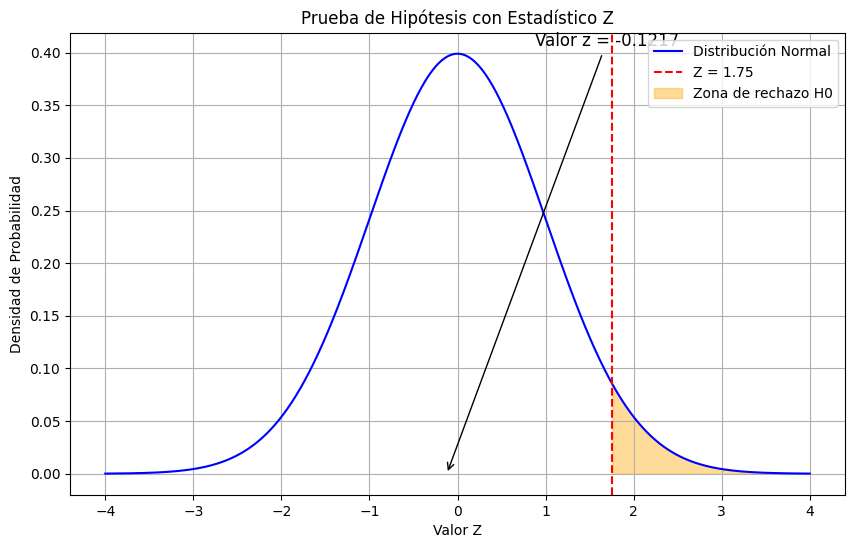

El valor de z critico es: 1.75
El valor estadistico de z es: -1.7437
Por lo tanto no se rechaza la hipotesis nula

El valor p es 0.9593984
El valor de significancia es 0.04


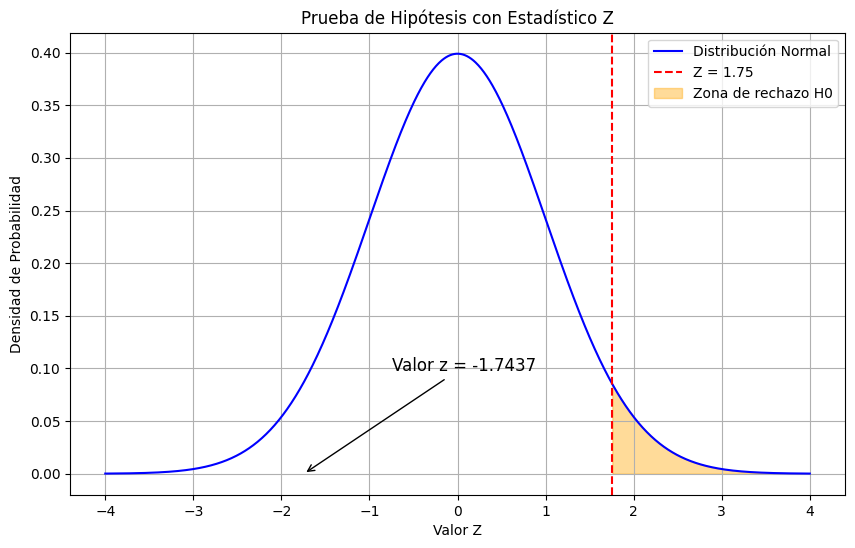

El valor de z critico es: 1.75
El valor estadistico de z es: 2.2259
Por lo tanto se rechaza la hipotesis nula

El valor p es 0.013011
El valor de significancia es 0.04


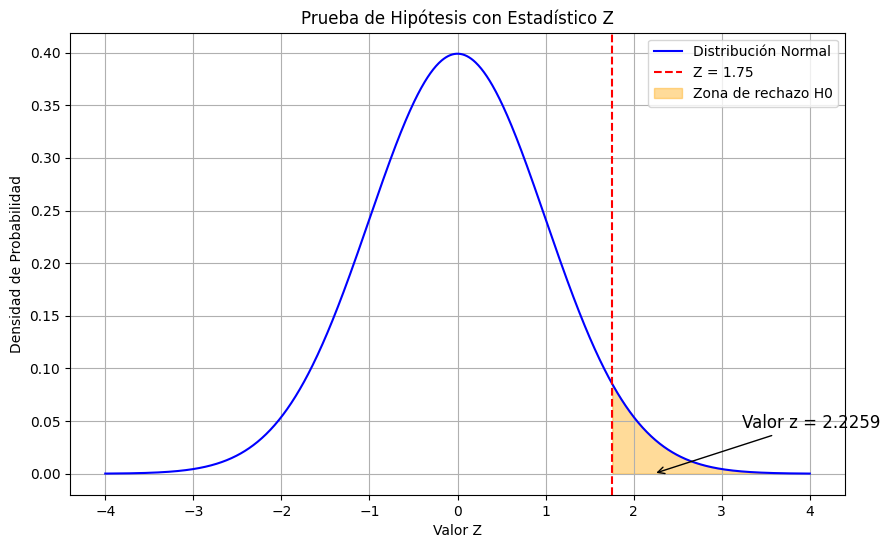

In [ ]:
lmz20_21 = prueba_de_hipotesis_cuan(2020, 2023, "gen_z", "p4", ">")
lmb20_21 = prueba_de_hipotesis_cuan(2020, 2023, "baby_boomers", "p4", ">")
lmm20_21 = prueba_de_hipotesis_cuan(2020, 2023, "millennials", "p4", ">")



Prueba de hipotesis para cambio en medias poblacionales de revistas leidas

El valor de z critico es: 1.75
El valor estadistico de z es: 1.2239
Por lo tanto no se rechaza la hipotesis nula

El valor p es 0.1104954
El valor de significancia es 0.04


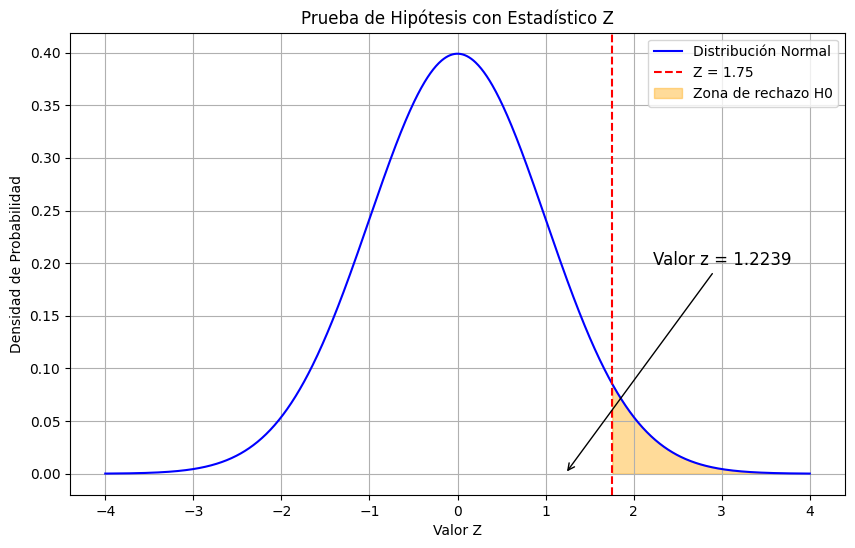

El valor de z critico es: 1.75
El valor estadistico de z es: 2.745
Por lo tanto se rechaza la hipotesis nula

El valor p es 0.003026
El valor de significancia es 0.04


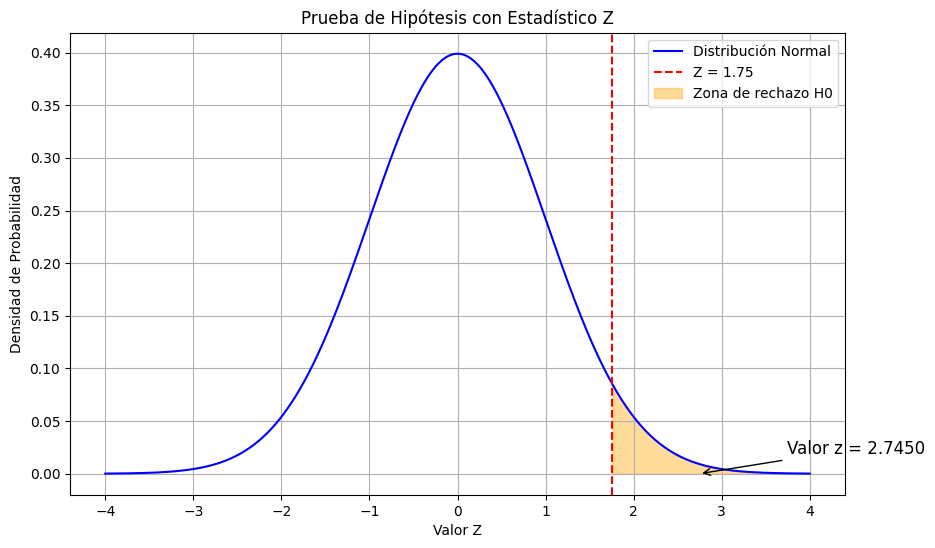

El valor de z critico es: 1.75
El valor estadistico de z es: 4.5309
Por lo tanto se rechaza la hipotesis nula

El valor p es 2.9e-06
El valor de significancia es 0.04


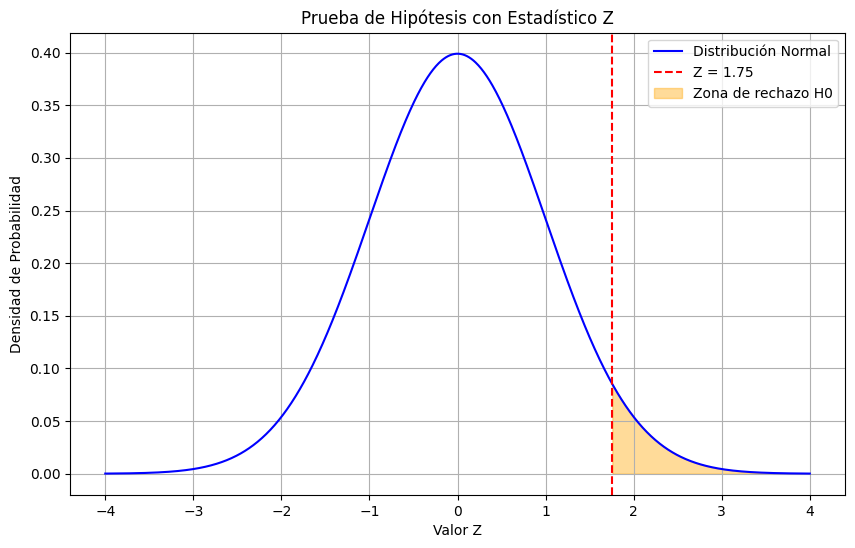

In [ ]:
rmz20_21 = prueba_de_hipotesis_cuan(2020, 2021, "gen_z", "p10", ">")
rmb20_21 = prueba_de_hipotesis_cuan(2020, 2021, "baby_boomers", "p10", ">")
rmm20_21 = prueba_de_hipotesis_cuan(2020, 2021, "millennials", "p10", ">")


Prueba de hipotesis para cambio en medias poblacionales de periodicos leidos

El valor de z critico es: -1.75
El valor estadistico de z es: -4.2047
Por lo tanto no se rechaza la hipotesis nula

El valor p es 0.9999869
El valor de significancia es 0.04


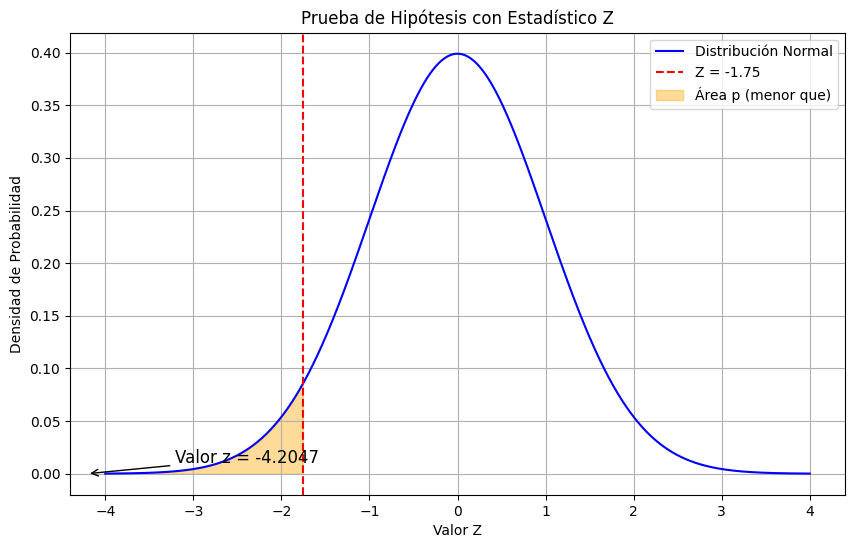

El valor de z critico es: -1.75
El valor estadistico de z es: -8.1041
Por lo tanto no se rechaza la hipotesis nula

El valor p es 1.0
El valor de significancia es 0.04


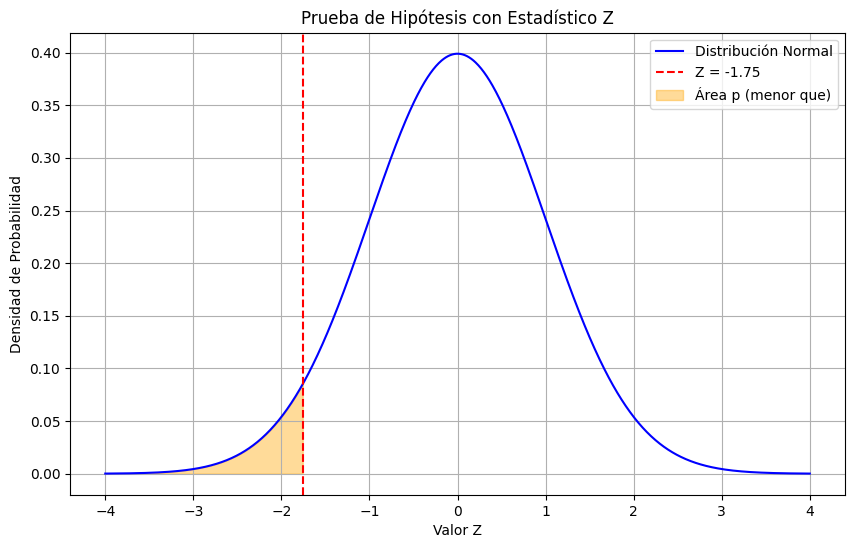

El valor de z critico es: -1.75
El valor estadistico de z es: -7.5394
Por lo tanto no se rechaza la hipotesis nula

El valor p es 1.0
El valor de significancia es 0.04


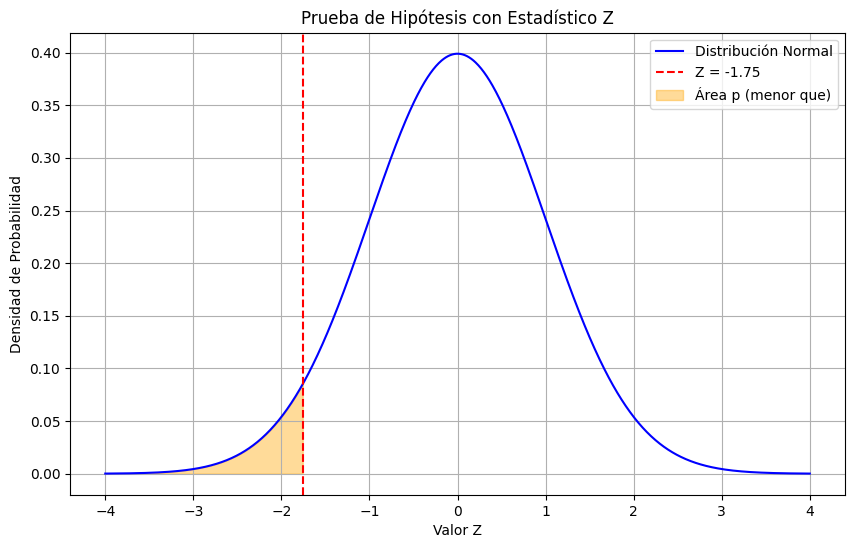

In [ ]:
pmz20_21 = prueba_de_hipotesis_cuan(2019, 2023, "gen_z", "p16", "<")
pmb20_21 = prueba_de_hipotesis_cuan(2019, 2023, "baby_boomers", "p16", "<")
pmm20_21 = prueba_de_hipotesis_cuan(2019, 2023, "millennials", "p16", "<")



In [ ]:
xdlol1 = me2(2020, "gen_z", "p8_1")
xdlol2 = me2(2023, "gen_z", "p8_1")
print(np.mean(xdlol1))
print(np.mean(xdlol2))
tvalor, pvalor = stats.ttest_ind(xdlol1, xdlol2)
print(f"Valor t: {tvalor}\nValor p: {pvalor}")

1.078125
0.9523809523809523
Valor t: 1.3191768786993938
Valor p: 0.18795309875249736
